<a href="https://www.kaggle.com/code/emigiupponi/btc-vs-merval-volatility?scriptVersionId=135843817" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install --upgrade pytrends

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq

# Configuración de la API de Google Trends
pytrends = TrendReq(hl='es-AR', tz=360)

# Definir los términos de búsqueda y los filtros de tiempo
keywords = ['Bitcoin', 'Merval']
timeframe = '2022-06-01 2023-06-30'
geo = 'AR'

# Obtener los datos de búsqueda de Google Trends
pytrends.build_payload(keywords, timeframe=timeframe, geo=geo)
interest_over_time = pytrends.interest_over_time()

# Calcular la volatilidad de las búsquedas
volatility = interest_over_time[keywords].std()

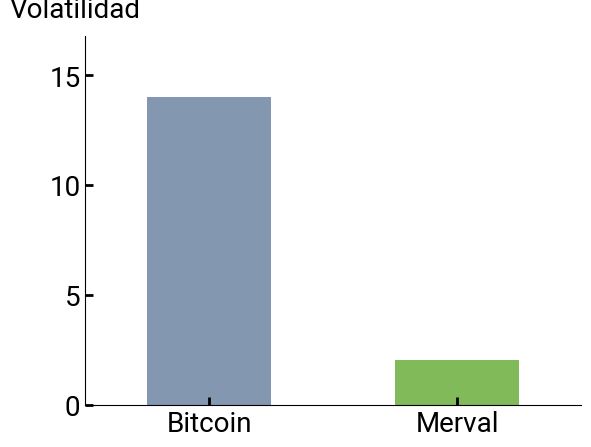

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
from matplotlib import font_manager
from io import BytesIO
import textwrap
import tempfile

# Descargar la fuente Roboto desde la web
font_url = 'https://github.com/google/fonts/blob/main/apache/roboto/static/Roboto-Regular.ttf?raw=true'
font_data = requests.get(font_url).content

# Guardar el contenido de la fuente en un archivo temporal
with tempfile.NamedTemporaryFile(suffix='.ttf', delete=False) as tmp_file:
    tmp_file.write(font_data)
    font_path = tmp_file.name

# Registrar la fuente Roboto en matplotlib
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Roboto'

# Crear el gráfico de barras de volatilidad
fig, ax = plt.subplots()
volatility.plot(kind='bar', ax=ax, color=['#8497B0', '#81BB59'])

# Configurar el fondo transparente
fig.patch.set_alpha(0)

# Configurar las marcas de graduación en los ejes x e y como internas
ax.tick_params(axis='both', direction='in', length=6, width=2, colors='black')

# Configurar las leyendas del eje x en posición horizontal
plt.xticks(rotation='horizontal')

# Configurar la fuente como Roboto
plt.rcParams['font.family'] = 'Roboto'
# Configurar el tamaño de las leyendas
plt.rcParams['legend.fontsize'] = 20

# Configurar tamaño de fuente en ejes x e y
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

# Ajustar el tamaño del eje y en un 20% más que el valor máximo de las barras
max_value = volatility.max().max()
ax.set_ylim(0, max_value * 1.2)

# Configurar etiquetas de los ejes
ax.set_ylabel('Volatilidad', fontsize=20)
ax.yaxis.get_label().set_rotation(0)  # Rotar el eje Y en el subplot superior
ax.yaxis.get_label().set_verticalalignment('center')  # Alinear verticalmente el eje Y en el subplot superior
ax.yaxis.set_label_coords(-0.02, 1.07)  # Ajustar la posición del texto en el eje Y en el subplot superior

# Eliminar recuadro del gráfico
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)

# Guardar el gráfico como imagen PNG con fondo transparente
plt.savefig('volatilidad_gtrends.png', format='png', transparent=True)

# Mostrar el gráfico
plt.show()

In [4]:
volatility

Bitcoin    14.001194
Merval      2.033486
dtype: float64